In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('data/Train.csv')
df_test = pd.read_csv('data/Test.csv')

In [3]:
print(df.shape)
print(df_test.shape)

(3506, 9)
(1503, 8)


In [4]:
df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [5]:
df.describe()

,ID,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions
count,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000
mean,2282.233600,2008.990302,3.790831,0.405824,2.171021
std,1287.273422,4.304252,3.141781,0.455541,2.495396
min,1.000000,1997.000000,0.568966,0.000341,0.001524
25%,1220.250000,2006.000000,1.738095,0.065966,0.965679
50%,2262.500000,2009.000000,2.766667,0.233333,1.866140
75%,3404.750000,2012.000000,4.621528,0.598333,2.792029
max,4523.000000,2019.000000,23.250000,2.325000,84.226041


In [6]:
df.drop_duplicates().shape

(3506, 9)

No Duplicates!

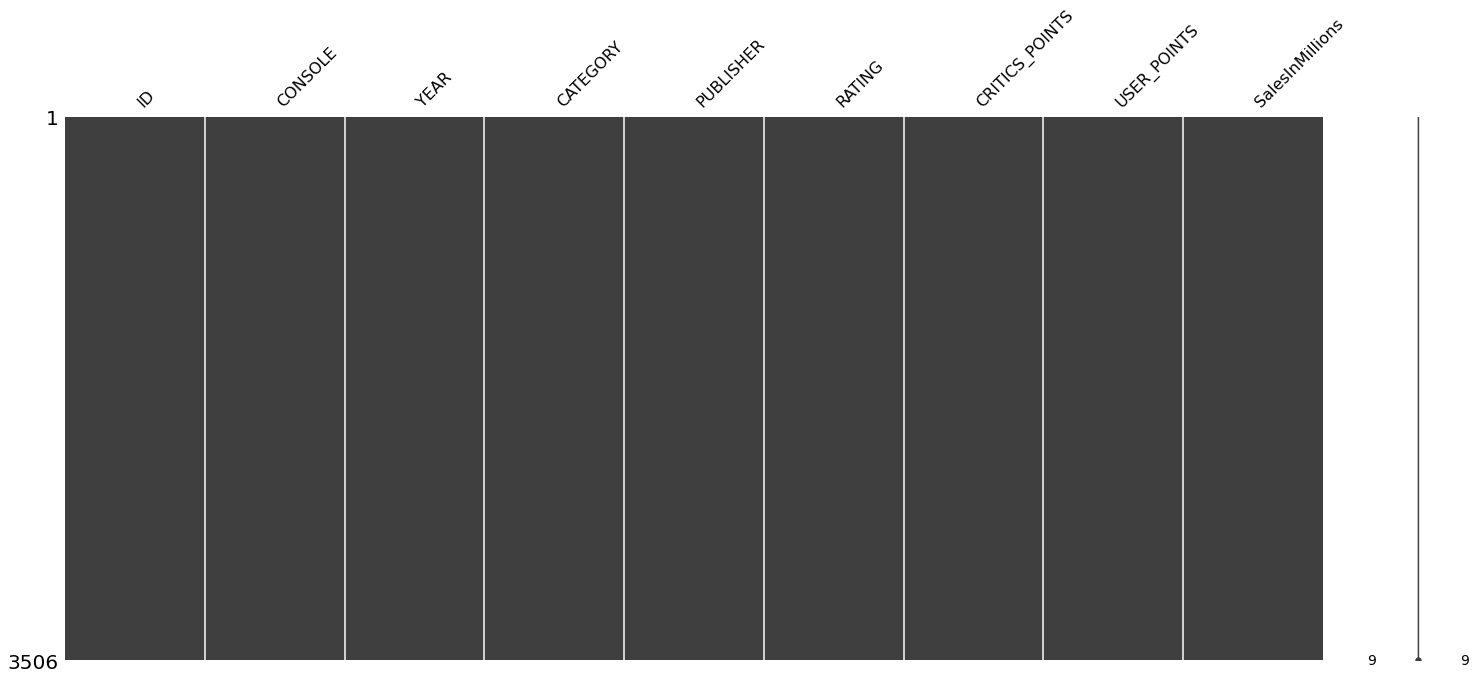

In [7]:
msno.matrix(df)

No missing Values!

In [8]:
for col in df.columns.to_list():
    print("{} : {}".format(col, df[col].nunique()))

ID : 2654
CONSOLE : 17
YEAR : 23
CATEGORY : 12
PUBLISHER : 204
RATING : 6
CRITICS_POINTS : 1683
USER_POINTS : 2187
SalesInMillions : 3506


Weird thing is, ID is not unique for each row and doesn't match up to any row!

In [9]:
for i, row in df.loc[:,['ID','PUBLISHER']].groupby('ID').agg(list).iterrows():
    if len(set(row[0])) != 1:
        print(row[0])

['Nordic Games', 'Microsoft Game Studios']
['Destination Software, Inc', 'Virgin Interactive']
['Xplosiv', 'Empire Interactive']
['Ubisoft', 'Konami Digital Entertainment']
['Sci', 'Gotham Games']
['Atari', 'Atari', 'Namco Bandai Games']
['Namco Bandai Games', 'Tecmo Koei']
['Redoctane', 'Activision']
['Activision', 'Aspyr', 'Activision', 'Activision']
['Vivendi Games', 'Electronic Arts']
['Bam! Entertainment', 'Vivendi Games']
['Konami Digital Entertainment', 'Vivendi Games']
['Activision', 'Lucasarts', 'Activision']
['Microsoft Game Studios', 'Electronic Arts']
['Thq', 'Sony Computer Entertainment']
['Infogrames', 'Monster Games']
['Atari', 'Thq']
['Crave Entertainment', 'System 3 Arcade Software']
['Mastertronic', 'Popcap Games', 'Popcap Games', 'Popcap Games']
['Valve', 'Valve Software']
['Sony Computer Entertainment', 'Namco Bandai Games']
['Virgin Interactive', 'Avalon Interactive']
['Electronic Arts', 'Mtv Games']
['Rebellion', 'Take-Two Interactive']
['Mc2 Entertainment', 'Ubis

In [10]:
for i, row in df_test.loc[:,['ID','PUBLISHER']].groupby('ID').agg(list).iterrows():
    if len(set(row[0])) != 1:
        print(row[0])

['Valve Software', 'Electronic Arts']
['Lucasarts', 'Lucasarts', 'Lucasarts', 'Activision']
['505 Games', 'Screenlife', '505 Games']
['Black Bean Games', 'Sony Computer Entertainment']


In [11]:
import pandas_profiling
profile = df.profile_report(title='Game_Sales_Profile')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Profile_1.html')

mkdir: Profile_Report: File exists


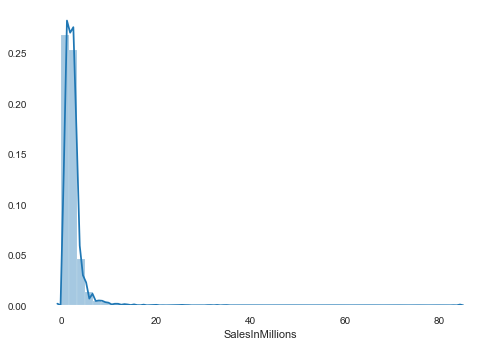

In [12]:
sns.distplot(df.SalesInMillions)

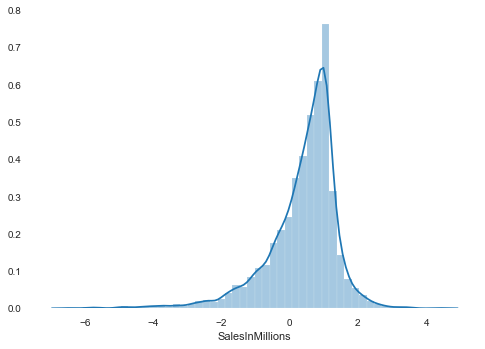

In [13]:
sns.distplot(np.log(df.SalesInMillions))

Log transformation works better!

In [14]:
df['LogSalesInMillions'] = np.log(df.SalesInMillions)

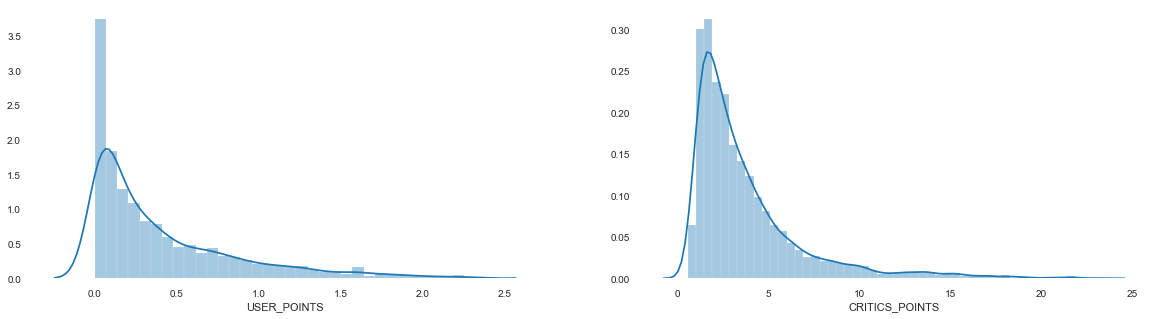

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.USER_POINTS)
plt.subplot(1,2,2)
sns.distplot(df.CRITICS_POINTS)

Looks like they are on different scales!

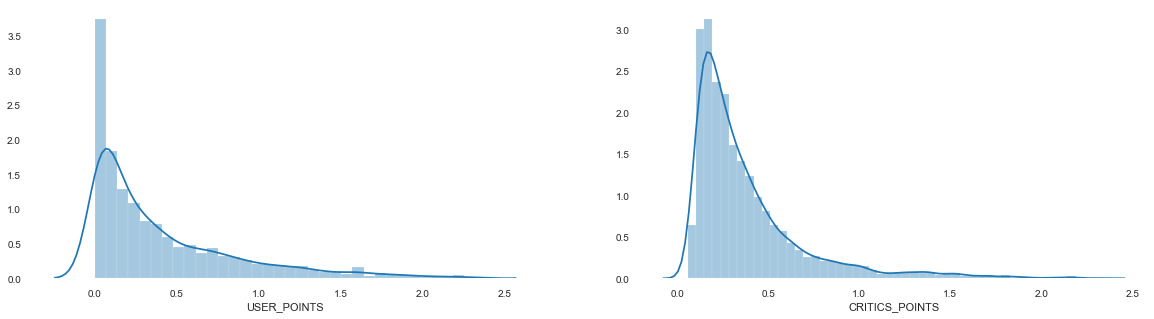

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.USER_POINTS)
plt.subplot(1,2,2)
sns.distplot(df.CRITICS_POINTS/10)

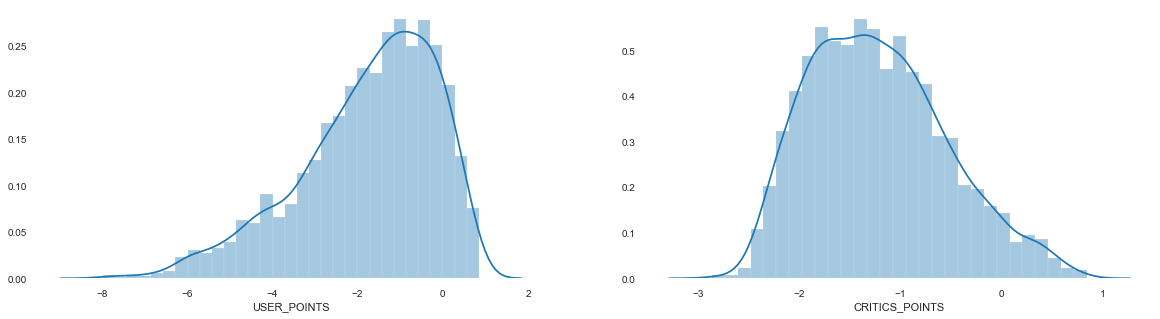

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(np.log(df.USER_POINTS))
plt.subplot(1,2,2)
sns.distplot(np.log(df.CRITICS_POINTS/10))

Much better!

In [18]:
df['LogUserRatings'] = np.log(df.USER_POINTS)
df['LogCriticsRatings'] = np.log(df.CRITICS_POINTS / 10)

In [19]:
cat_cols = ['CONSOLE', 'YEAR', 'CATEGORY', 'RATING']
num_cols = ['CRITICS_POINTS', 'USER_POINTS', 'LogUserRatings', 'LogCriticsRatings']

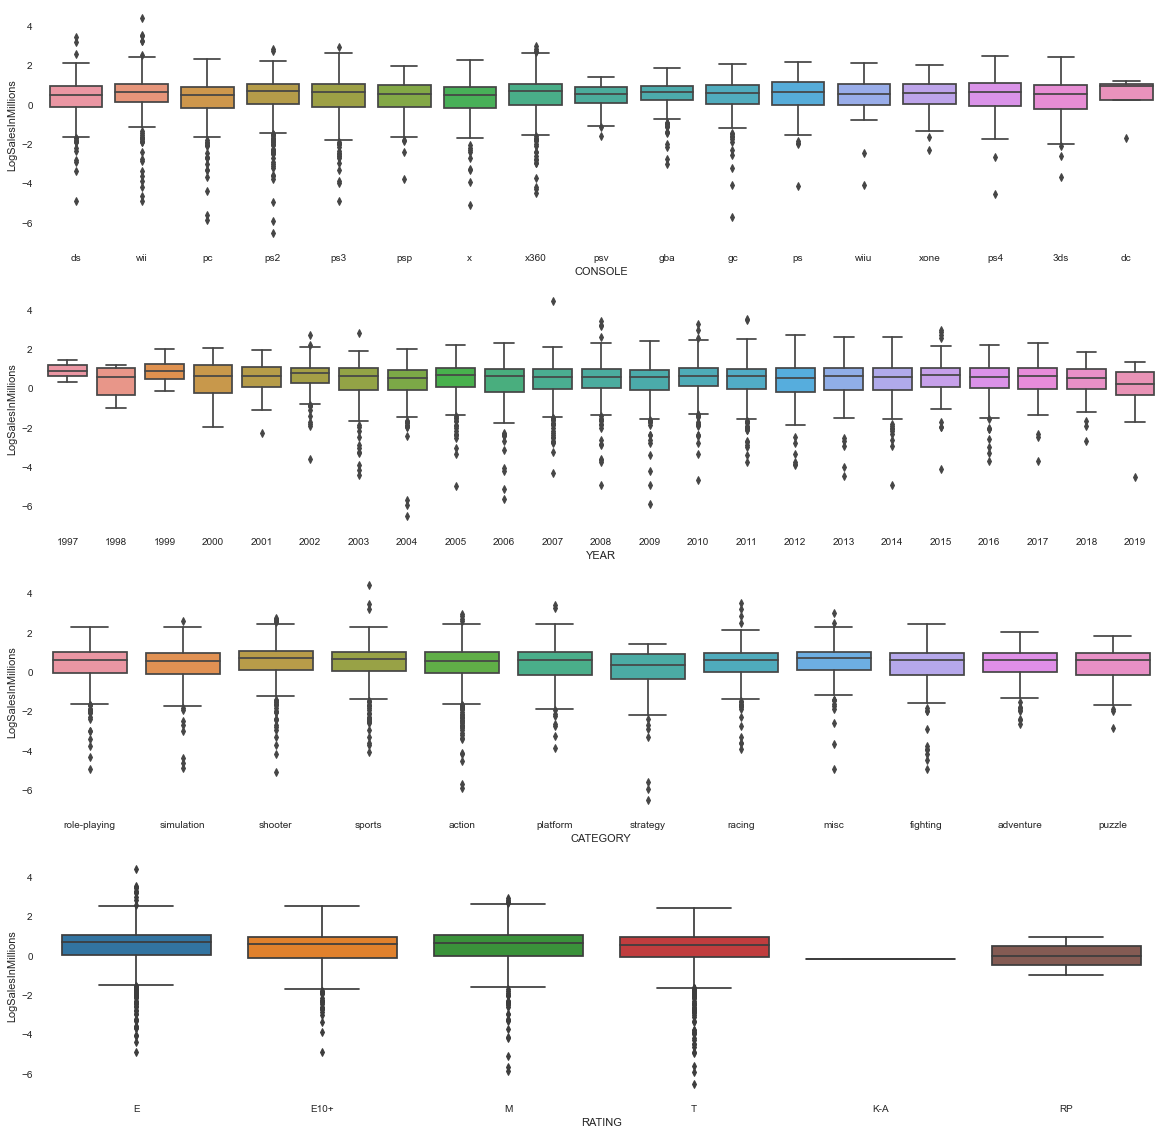

In [20]:
plt.figure(figsize=(20,20))
for i, col in enumerate(cat_cols):
    plt.subplot(4,1,i+1)
    sns.boxplot(x = df[col], y = df.LogSalesInMillions)

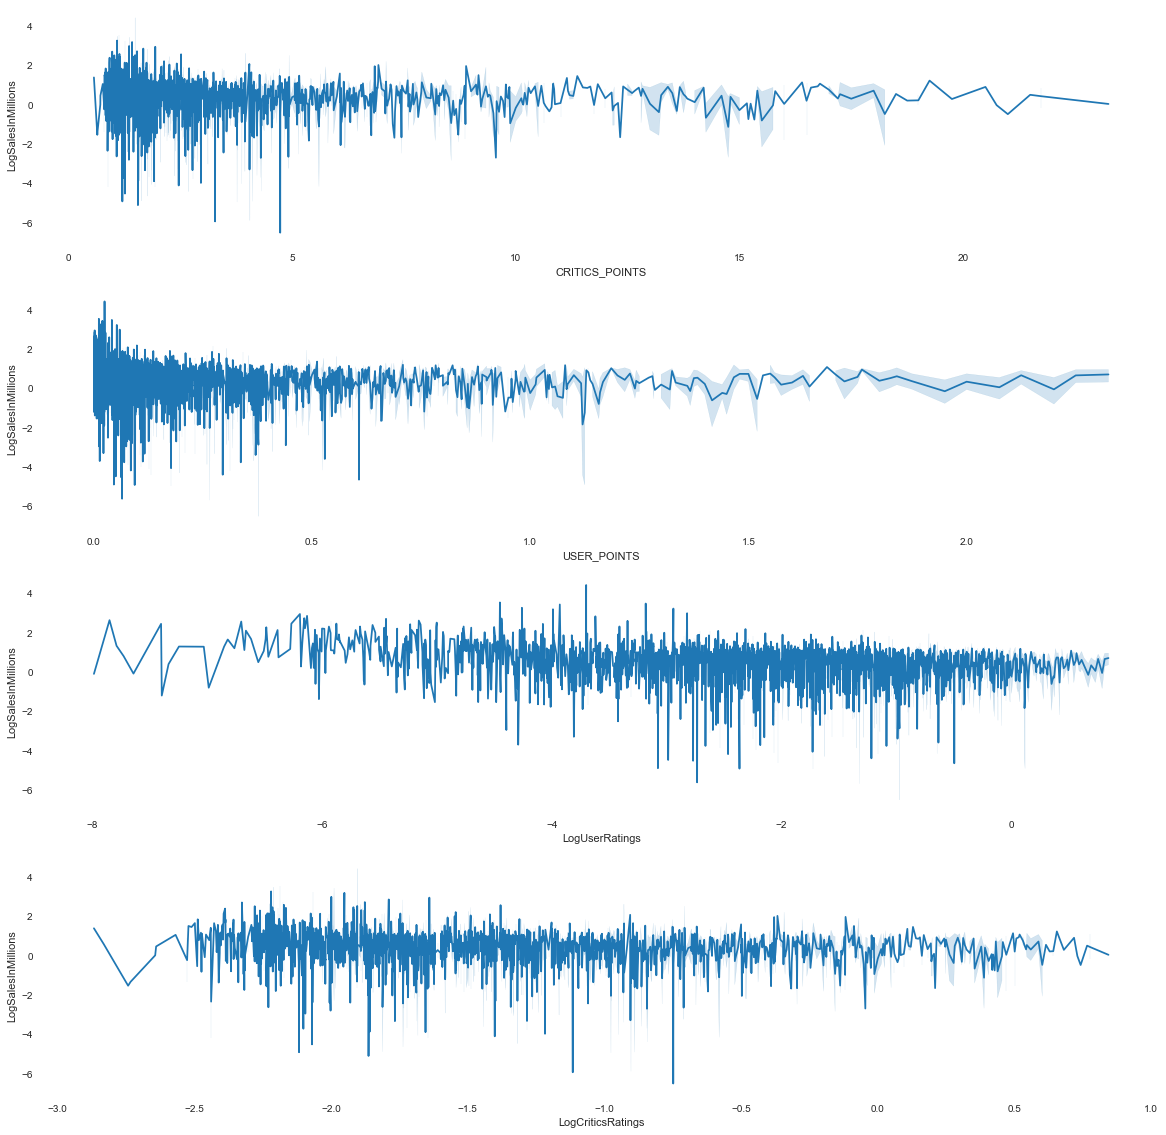

In [21]:
plt.figure(figsize=(20,20))
for i, col in enumerate(num_cols):
    plt.subplot(4,1,i+1)
    sns.lineplot(x = df[col], y = df.LogSalesInMillions)

In [22]:
df.RATING.value_counts()

T       1182
E       1061
M        749
E10+     511
RP         2
K-A        1
Name: RATING, dtype: int64

In [23]:
df_test.RATING.value_counts()

T       530
E       457
M       321
E10+    194
AO        1
Name: RATING, dtype: int64

In [24]:
df[abs(df.LogSalesInMillions) > 3].shape

(50, 12)

In [25]:
df[abs(df.LogSalesInMillions) > 3]

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions,LogSalesInMillions,LogUserRatings,LogCriticsRatings
70,4269,ps3,2010,action,Sega,M,1.710526,0.231250,0.036353,-3.314488,-1.464256,-1.765784
107,1707,pc,2006,strategy,Vivendi Games,T,2.677419,0.064844,0.003719,-5.594332,-2.735775,-1.317732
203,1112,pc,2012,strategy,Paradox Interactive,T,2.392857,0.116327,0.036723,-3.304345,-2.151354,-1.430097
482,1267,ps,2003,action,Eidos Interactive,M,5.600000,0.523529,0.015979,-4.136455,-0.647162,-0.579818
852,1416,ps2,2003,platform,Konami Digital Entertainment,E,4.916667,1.416667,0.039972,-3.219583,0.348307,-0.709954
966,2124,wii,2011,racing,Nintendo,E,1.123288,0.011657,34.722026,3.547374,-4.451822,-2.186325
1017,3992,ps3,2014,role-playing,Nippon Ichi Software,T,1.204545,0.093750,0.007470,-4.896825,-2.367124,-2.116483
1030,1318,ds,2008,simulation,Square Enix,E10+,1.634615,0.046108,0.007652,-4.872734,-3.076773,-1.811178
1036,4344,wii,2007,sports,Nintendo,E,1.490196,0.024691,84.226041,4.433504,-3.701302,-1.903677
1049,2282,x,2005,racing,Microsoft Game Studios,E,1.853659,0.276667,0.036576,-3.308356,-1.284942,-1.685424


In [26]:
df.shape

(3506, 12)

In [27]:
df_cleaned1 = df.drop(df[abs(df.LogSalesInMillions) > 3].index, axis = 0)

In [28]:
def rating_mapper(rating):
    if rating in ['T', 'E', 'M', 'E10+']:
        return rating
    return 'O' #other

In [29]:
df_cleaned1['MappedRating'] = df.RATING.apply(rating_mapper)

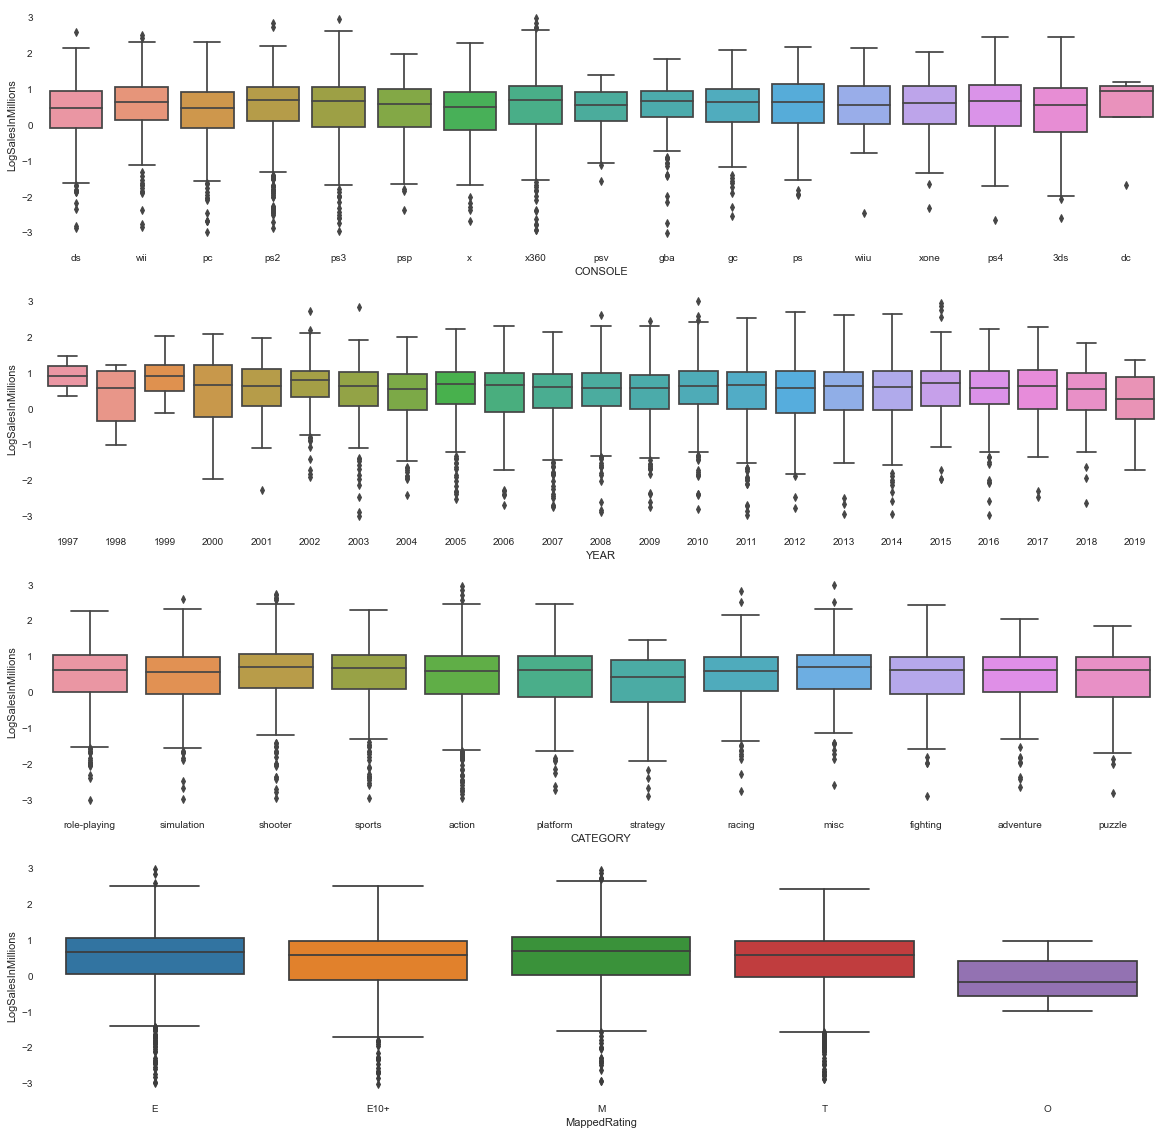

In [30]:
plt.figure(figsize=(20,20))
columns = ['CONSOLE', 'YEAR', 'CATEGORY', 'MappedRating']
for i, col in enumerate(columns):
    plt.subplot(4,1,i+1)
    sns.boxplot(x = df_cleaned1[col], y = df_cleaned1.LogSalesInMillions)

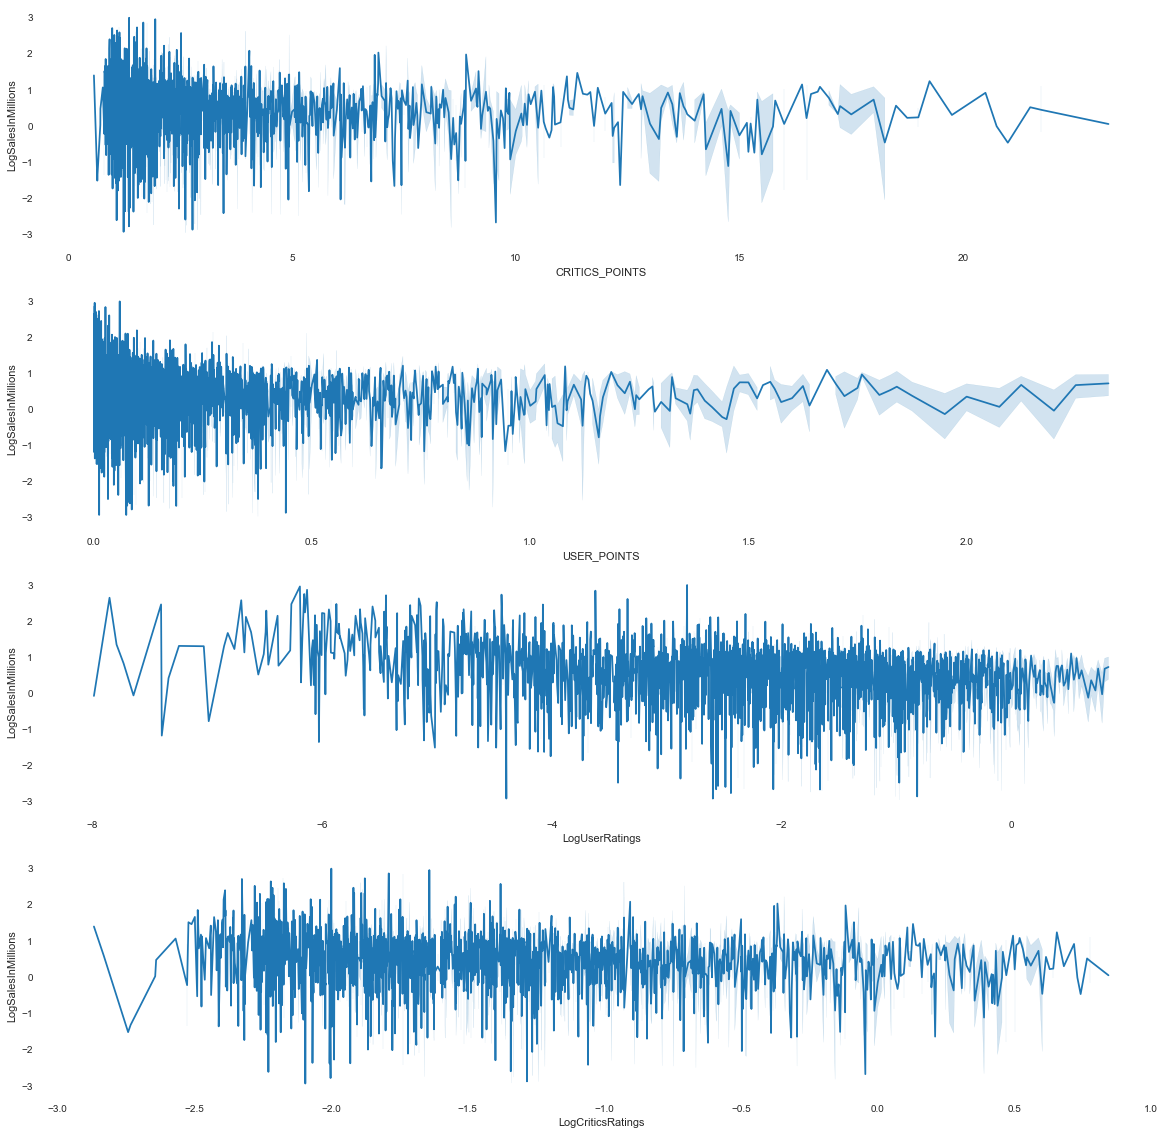

In [31]:
plt.figure(figsize=(20,20))
columns = ['CRITICS_POINTS', 'USER_POINTS', 'LogUserRatings', 'LogCriticsRatings']
for i, col in enumerate(columns):
    plt.subplot(4,1,i+1)
    sns.lineplot(x = df_cleaned1[col], y = df_cleaned1.LogSalesInMillions)

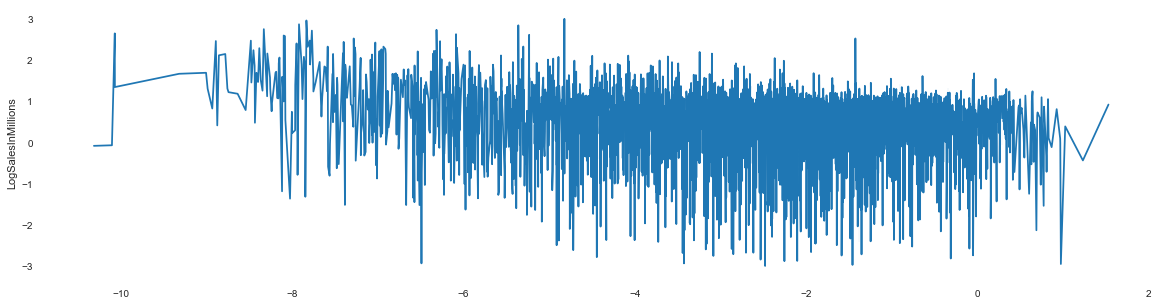

In [32]:
plt.figure(figsize=(20,5))
sns.lineplot(x = df_cleaned1.LogCriticsRatings + df_cleaned1.LogUserRatings, y = df_cleaned1.LogSalesInMillions)

In [33]:
df_cleaned1.YEAR.value_counts()

2008    302
2009    296
2010    288
2007    280
2011    258
2005    234
2006    225
2004    221
2012    211
2013    190
2014    187
2003    172
2015    123
2016    122
2002     95
2017     78
2001     56
2018     52
2019     27
2000     23
1998      8
1999      6
1997      2
Name: YEAR, dtype: int64

In [34]:
release_dict = dict()
for year, releases in zip(df_cleaned1.YEAR.value_counts().index.to_list(), df_cleaned1.YEAR.value_counts().to_list()):
    release_dict[year] = releases

In [35]:
release_dict

{2008: 302,
 2009: 296,
 2010: 288,
 2007: 280,
 2011: 258,
 2005: 234,
 2006: 225,
 2004: 221,
 2012: 211,
 2013: 190,
 2014: 187,
 2003: 172,
 2015: 123,
 2016: 122,
 2002: 95,
 2017: 78,
 2001: 56,
 2018: 52,
 2019: 27,
 2000: 23,
 1998: 8,
 1999: 6,
 1997: 2}

In [36]:
df_cleaned1['ReleasesYear'] = df_cleaned1.YEAR.apply(lambda x: release_dict.get(x))

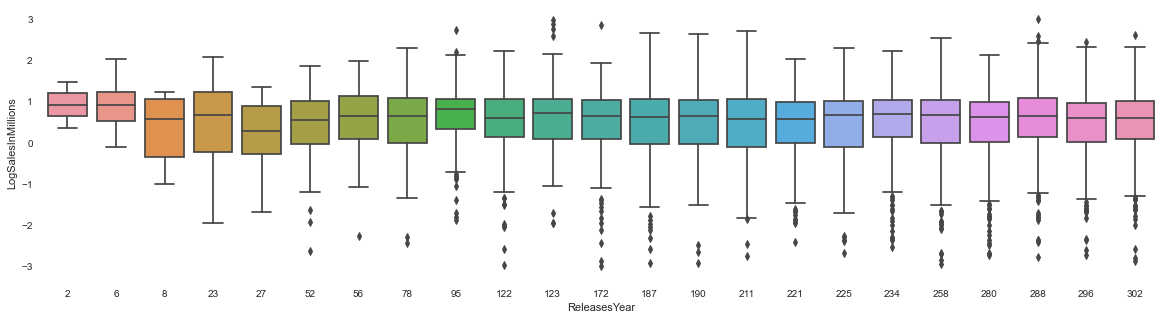

In [37]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_cleaned1.ReleasesYear, y = df_cleaned1.LogSalesInMillions)

In [42]:
df_cleaned1.columns

Index(['ID', 'CONSOLE', 'YEAR', 'CATEGORY', 'PUBLISHER', 'RATING',
       'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions',
       'LogSalesInMillions', 'LogUserRatings', 'LogCriticsRatings',
       'MappedRating', 'ReleasesYear'],
      dtype='object')

In [41]:
import pandas_profiling
profile = df_cleaned1.drop(['ID','RATING','CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'], axis=1).profile_report(title='Game_Sales_Profile')
!mkdir Profile_Report
profile.to_file(output_file='Profile_Report/Profile_2.html')

mkdir: Profile_Report: File exists
